In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/nutrient.csv",
                   index_col=0)

In [3]:
df

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [4]:

from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
dfscaled=scaler.fit_transform(df)

dfscaled = pd.DataFrame(dfscaled,
                          columns=df.columns,
                          index=df.index)

In [5]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with clusters: model
model = KMeans(n_clusters=3,random_state=2021)

# Fit model to points
model.fit(dfscaled)

# Cluster Centroids
print(model.cluster_centers_)

[[-0.51195131  0.2996008  -0.5754241   0.20289817 -0.32268836]
 [ 1.24555785  0.          1.27406355 -0.45948334  0.05940436]
 [-1.50939981 -2.39680639 -1.1298932   0.44448967  2.31418728]]


In [6]:
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(dfscaled)

# Print cluster labels of new_points
print(labels)

clusterID = pd.DataFrame({'ClustID':labels})
clusteredData = pd.concat([df.reset_index(),clusterID],axis=1)

[1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0]


In [7]:
### OR

clusterID = pd.DataFrame({'ClustID':labels},index=df.index)
clusteredData = pd.concat([df,clusterID],
                          axis='columns')

# Variation
print(model.inertia_)

61.53871293694049


In [9]:
clustNos = [2,3,4,5,6,7,8,9,10]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2019)
    model.fit(dfscaled)
    Inertia.append(model.inertia_)

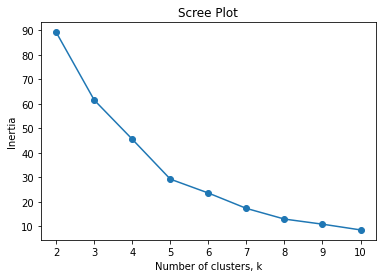

In [10]:
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()


In [11]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=5,random_state=2019)

# Fit model to points
model.fit(dfscaled)

KMeans(n_clusters=5, random_state=2019)

In [12]:
# Determine the cluster labels of new_points: labels
labels = model.predict(dfscaled)


clusterID = pd.DataFrame({'ClustID':labels},index=df.index)
clusteredData = pd.concat([df,clusterID],
                          axis='columns')

In [13]:
clusteredData.groupby('ClustID').mean()
clusteredData.sort_values('ClustID')

,energy,protein,fat,calcium,iron,ClustID
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,0
PORK SIMMERED,355,19,30,9,2.4,0
PORK ROAST,340,19,29,9,2.5,0
SMOKED HAM,340,20,28,9,2.5,0
LAMB LEG ROAST,265,20,20,9,2.6,0
LAMB SHOULDER ROAST,300,18,25,9,2.3,0
BEEF STEAK,375,19,32,9,2.6,0
BEEF ROAST,420,15,39,7,2.0,0
PERCH FRIED,195,16,11,14,1.3,1
